In [3]:
!pip install keras==2.8.0

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 325.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 525.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 514.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 614.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 583.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 597.3 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.4 MB 628.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 610.3 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 612.3 kB/s eta 0:00:02
   --------- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires keras>=3.2.0, but you have keras 2.8.0 which is incompatible.


In [7]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.4/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.5/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.7/38.8 MB 2.1 MB/s eta 0:00:18
    --------------------------------------- 0.9/38.8 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.0/38.8 MB 2.5 MB/s eta 0:00:16
   - -------------------------------------- 1.2/38.8 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.3/38.8 MB 2.5 MB/s eta 0:00:15
   - ------

In [8]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [133]:
samples = 20000
df = pd.read_csv("train.csv")
base_path = "./images_001/"

In [72]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820.0
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169.0
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914.0
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140.0
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474.0
...,...,...,...
197775,7e58013acad0d833,https://upload.wikimedia.org/wikipedia/commons...,133795.0
197776,f338f670d8caf6aa,https://upload.wikimedia.org/wikipedia/commons...,85774.0
197777,1fa18d293c34ed43,https://upload.wikimedia.org/wikipedia/commons...,177555.0
197778,f83ba194049ce389,http://upload.wikimedia.org/wikipedia/commons/...,138598.0


In [99]:
samples = 20000
df = df.loc[df["id"].str.startswith('00', na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [100]:
num_classes

90

In [101]:
num_data

90

In [102]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,50089.0,1
1,198696.0,1
2,25093.0,1
3,67722.0,1
4,13025.0,1


In [103]:
data.tail()

,landmark_id,count
85,124923.0,1
86,105623.0,1
87,12425.0,1
88,16177.0,1
89,99446.0,1


In [104]:
data.columns=['landmark_id','count']

In [105]:
data['count'].describe()

count    90.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

(array([ 0., 90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.  ,  0.58,  1.16,  1.74,  2.32,  2.9 ,  3.48,  4.06,  4.64,
         5.22,  5.8 ,  6.38,  6.96,  7.54,  8.12,  8.7 ,  9.28,  9.86,
        10.44, 11.02, 11.6 , 12.18, 12.76, 13.34, 13.92, 14.5 , 15.08,
        15.66, 16.24, 16.82, 17.4 , 17.98, 18.56, 19.14, 19.72, 20.3 ,
        20.88, 21.46, 22.04, 22.62, 23.2 , 23.78, 24.36, 24.94, 25.52,
        26.1 , 26.68, 27.26, 27.84, 28.42, 29.  , 29.58, 30.16, 30.74,
        

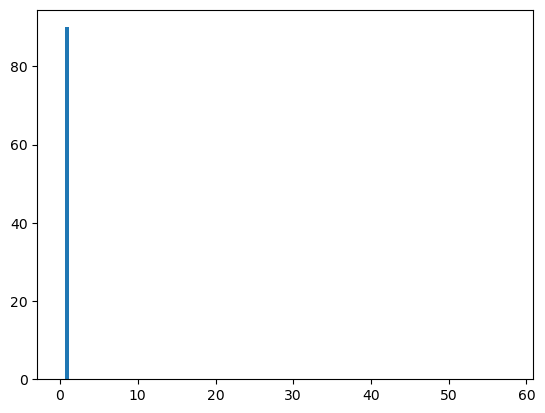

In [106]:
plt.hist(data['count'], 100, range = (0,58),label = 'test')

In [107]:
data['count'].between(0,5).sum()

90

In [108]:
data['count'].between(5,10).sum()

0

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2.]),
 array([  3359.,   5387.,  11043.,  12425.,  13025.,  13545.,  13755.,
         16177.,  19671.,  22587.,  25093.,  26066.,  27404.,  33263.,
         35744.,  36407.,  37732.,  41310.,  46206.,  50089.,  51465.,
         51761.,  58801.,  59827.,  61635.,  61937.,  67116.,  67722.,
         70642.,  72836.,  75864.,  78691.,  83770.,  87845.,  88035.,
         91059.,  94024.,  98363.,  99446.,  99868., 100635., 100837.,
        104017., 104107., 105106., 105623., 116378., 117635., 119649.,
        120511., 120911., 123328., 123495., 124923., 126537., 127808.,
        128926., 129324., 

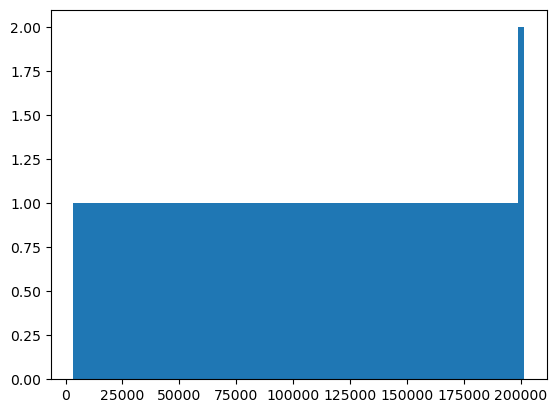

In [109]:
plt.hist(df["landmark_id"], bins=sorted(df["landmark_id"].unique()))


In [110]:
#Training of model
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [115]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089.0
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404.0
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066.0
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744.0
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937.0


In [112]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [114]:
def encode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [127]:
def get_image_from_number(num):
    fname, label = df.loc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path =os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path, path))
    return im, label

In [ ]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()
    

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [140]:
!pip install --upgrade tensorflow keras


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 991.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.1 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 2.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 2.6 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.1 MB 2.8 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 3.1 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.1 MB 3.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.1/1.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
#Parameters
learning_rate = 0.0001
decay_speed   =1e-6
momentum      =0.09
loss_function ="sparse_categorical_crossentropy"
source_model  =VGG19(weights=None)
drop_layer    =Dropout(0.5)
drop_layer    =Dropout(0.5)

In [ ]:
model = Sequential()
for layer in source_model.layer[:-1]:
    if layer == source_model.layers[-25:]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes,activation = "softmax"))
model.summary()

In [ ]:
optiml = keras.optimizer_v1.RMSprop(lr = learning_rate)
model.compile(optimizer=optiml,
             loss=loss_function,
             metrics = ["accuracy"])

In [150]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [151]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start+batch_size
    if(end_img) > len(dataframe):
       end_image = len(dataframe)

    for idx in range(start, end_image):
        n = idx
        im ,label = get_image_from_number(n, dataframe)

        im = image_reshape(im, (224,224)) / 225.0
        image_array.append(im)
        label_array.append(label)

    label_array = encode_label(label_array)

    return np.array(image_array), np.array(label_array)

In [ ]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

#split
train, val = np.split(df.sample(frac=1),[int(0.8*len(df))])
print(len(train))
print(len(val))

In [ ]:
for e in range(epochs):
    print("Epoch :" + str (e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train,y_train = get_batch(train, it*batch_size, batch_size)

        model.train_on_batch(X_train, y_train)

model.save("Model")

In [ ]:
#Test
def get_image_from_number(n, dataframe):
im, label = get_image_from_number(n)

batch_size = 16

errors = 0
good_preds = []
bad_preds =[]

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(X_val)
    cla = np.argmax(result,axis=1)
    for idx,res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx],res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx],res[cla[idx]]])

In [169]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))

In [ ]:
fig=plt.figure(figsize=(16,16))
for i in range(1,6):
    n = int(good_preds[i,0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img,cv2,COLOR_BGR2RGB)
    fig.add_subplot(1,5,i)
    plt,imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl))
    plt.axis("off")
plt.show()

